<a href="https://colab.research.google.com/github/BhaavyaShukla/BhaavyaShukla/blob/main/Neural_Network_Lab_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codes given in class

In [ ]:
from numpy import exp
def softmax(vector):
    e = exp(vector)
    return e/e.sum()
data = [1,2,3]
result = softmax(data)
print(result)
print("The sum of the result is -> ",sum(result))

[0.09003057 0.24472847 0.66524096]
The sum of the result is ->  1.0


Experiment 1 Write  a python program to design a simple Neural Network

In [ ]:
import numpy as np
class NeuralNetwork():
    def __init__(self):
        # Seeding for random number generation
        np.random.seed(1)
        # converting weights to a 3 by 1 matrix with values from -1 to 1 with a mean 0
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
    def sigmoid(self,x):
        # applying sigmoid function
        return 1/(1 + np.exp(-x))
    def sigmoid_derivative(self,x):
        # Computing derivative to the Sigmoid function
        return x*(1-x)
    def train(self , training_inputs ,  training_outputs , training_iterations):
        # training the model using accurate prediction while adjusting weights continuously
        for iteration in range(training_iterations):
            # siphon the training data via neuron
            output = self.think(training_inputs)
            # Computing error rate for back propagation
            error = training_outputs - output
            # performing weight adjustments
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
    def think(self , inputs):
            # Passing the inputs via the neuron to get the output  converting values to float
            inputs =  inputs.astype(float)
            output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
            return output

if __name__ == "__main__":
    #  Initalizing tthe neuron
    NN = NeuralNetwork()
    print("Beginning Randomly Generated weights :")
    print(NN.synaptic_weights)
    # Training data consisting of 4 examples - 3 i/p values and 1 o/p value
    training_inputs = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    NN.train(training_inputs , training_outputs,15000)
    print("Ending Weight After Training :")
    print(NN.synaptic_weights)
    UI1 = input("User Input 1 : ")
    UI2 = input("User Input 2 : ")
    UI3 = input("User Input 3 : ")
    print("Considering New Situation: " , UI1 , UI2 , UI3)
    print("New Output data: ")
    print(NN.think(np.array([UI1 , UI2 , UI3])))
    print("WOW WE DID IT")


Exercise a

Perceptron function

In [ ]:
import numpy as np
from collections import Counter

class Perceptron:

    def __init__(self,
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        Initialize the Perceptron with given weights, bias, and learning rate.

        Args:
            weights: A list, tuple, or numpy array containing the initial weight values.
            bias: The bias term (default is 1).
            learning_rate: The learning rate for weight updates (default is 0.3).
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        """
        The step function used for activation.

        Args:
            x: Input value.

        Returns:
            1 if x is greater than 0, otherwise 0.
        """
        if x <= 0:
            return 0
        else:
            return 1

    def __call__(self, in_data):
        """
        Make a prediction for the given input data.

        Args:
            in_data: Input data as a list, tuple, or numpy array.

        Returns:
            1 if the dot product of weights and input data plus bias is greater than 0, otherwise 0.
        """
        in_data = np.array(in_data)
        result = np.dot(self.weights, in_data) + self.bias  # Calculate dot product with bias
        return Perceptron.unit_step_function(result)


    def adjust(self,
               target_result,
               in_data):
        """
        Adjust the weights based on the target result and input data.

        Args:
            target_result: The target result (0 or 1).
            in_data: Input data as a list, tuple, or numpy array.
        """
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate((np.array(in_data), np.array([self.bias])))
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        """
        Evaluate the perceptron's performance on a dataset.

        Args:
            data: List of input data samples.
            labels: List of corresponding labels (0 or 1).

        Returns:
            A Counter object with counts of correct and wrong predictions.
        """
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


In [ ]:
# Import necessary libraries
import numpy as np
from collections import Counter

# Define a Perceptron instance with specified initial weights, bias, and learning rate
p = Perceptron(weights=[0.3, 0.3, 0.3], bias=1, learning_rate=3.3)

# Define a function to generate labeled samples
def labelled_samples(n):
    for _ in range(n):
        # Generate random 2D data point 's'
        s = np.random.random((2,))
        # Yield a tuple: (data point, label) based on a condition
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

# Training the perceptron with labeled samples
for in_data, label in labelled_samples(30):
    p.adjust(label, in_data)

# Generate test data and labels for evaluation
test_data, test_labels = list(zip(*labelled_samples(60)))

# Evaluate the perceptron's performance on the test data
evaluation = p.evaluate(test_data, test_labels)

# Print the evaluation results (number of correct and wrong predictions)
print(evaluation)


Counter({'correct': 49, 'wrong': 11})


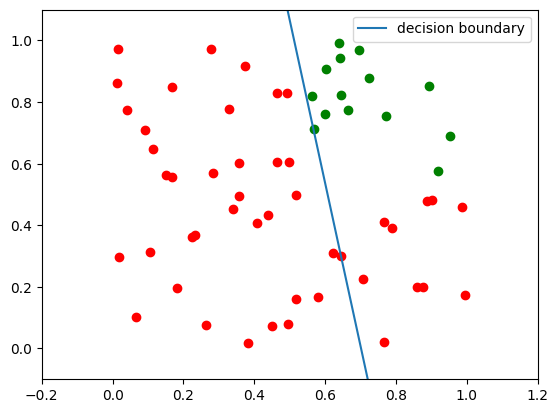

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Separate test data into two lists based on their labels
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

# Create a scatter plot for the data points labeled as '1' (green)
# and '0' (red) on a 2D plane
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))  # Extract X and Y coordinates of 'ones'
ax.scatter(X, Y, color="g")  # Plot 'ones' as green points
X, Y = list(zip(*zeroes))  # Extract X and Y coordinates of 'zeroes'
ax.scatter(X, Y, color="r")  # Plot 'zeroes' as red points

# Set the x and y axis limits for the plot
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# Calculate the equation of the decision boundary line based on the perceptron's weights
c = -p.weights[2] / p.weights[1]  # Intercept
m = -p.weights[0] / p.weights[1]  # Slope

# Generate X values for the decision boundary line
X = np.arange(xmin, xmax, 0.1)

# Plot the decision boundary line on the graph
ax.plot(X, m * X + c, label="decision boundary")

# Display the plot legend
ax.legend()

# Show the plot
plt.show()


Excercise b

In [ ]:
# Define a function to generate labeled samples
def labelled_samples(n):
    for _ in range(n):
        # Generate random 2D data point 's'
        s = np.random.random((2,))
        # Assign labels based on a condition: If s[0] is less than 0.5, label is '0'; otherwise, label is '1'
        yield (s, 0) if s[0] < 0.5 else (s, 1)

# Create a Perceptron instance with specified initial weights and learning rate
p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.4)

# Train the Perceptron by adjusting its weights based on the generated labeled samples
for in_data, label in labelled_samples(300):
    p.adjust(label, in_data)

# Generate test data and labels for evaluation
test_data, test_labels = list(zip(*labelled_samples(500)))

# Print the final weights of the trained Perceptron
print("Final Weights:", p.weights)

# Evaluate the Perceptron's performance on the test data and labels
p.evaluate(test_data, test_labels)


Final Weights: [ 2.40104368 -0.10551698 -1.3       ]


Counter({'correct': 465, 'wrong': 35})

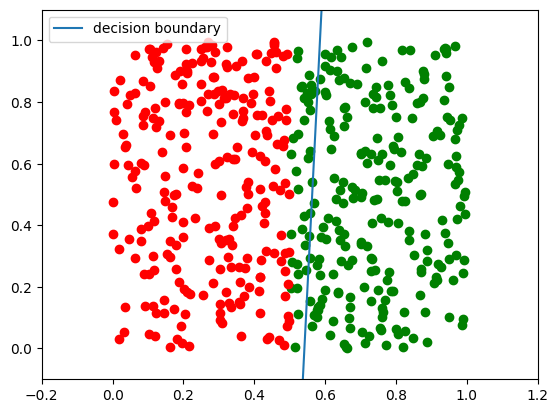

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Separate test data into two lists based on their labels ('1' and '0')
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

# Create a scatter plot for data points labeled as '1' (green) and '0' (red) on a 2D plane
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))  # Extract X and Y coordinates of 'ones'
ax.scatter(X, Y, color="g")  # Plot 'ones' as green points
X, Y = list(zip(*zeroes))  # Extract X and Y coordinates of 'zeroes'
ax.scatter(X, Y, color="r")  # Plot 'zeroes' as red points

# Set the x and y axis limits for the plot
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# Calculate the equation of the decision boundary line based on the Perceptron's weights
c = -p.weights[2] / p.weights[1]  # Calculate the intercept
m = -p.weights[0] / p.weights[1]  # Calculate the slope

# Generate X values for the decision boundary line
X = np.arange(xmin, xmax, 0.1)

# Plot the decision boundary line on the graph
ax.plot(X, m * X + c, label="decision boundary")

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


EXPERIMENT 3

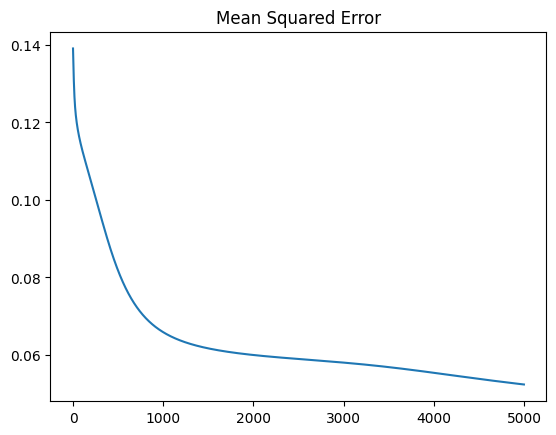

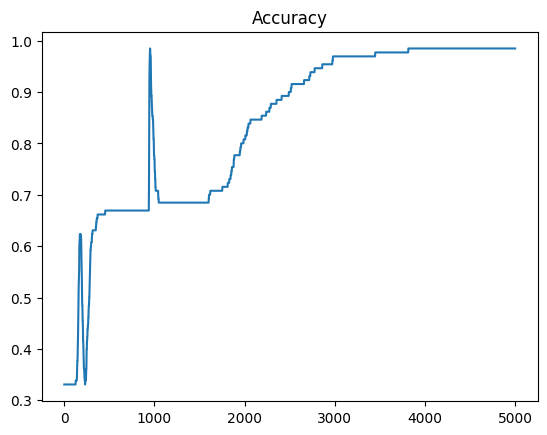




 Test accuracy: 0.95


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# Hyperparameters
learning_rate = 0.1
iterations = 5000
N = y_train.size
input_size = 4
hidden_size = 2
output_size = 3

np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

# Helper functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]

    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])

# Training loop

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

# Visualizing the results

results.mse.plot(title="Mean Squared Error")
plt.show()
print("", end = "\n\n\n ")
results.accuracy.plot(title="Accuracy")
plt.show()
print("", end = "\n\n\n ")
# Test the model

Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))

In [ ]:
import tensorflow as tf
import numpy as np

# Define the XOR input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
# Define the corresponding XOR output
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Create a sequential model
model = tf.keras.Sequential()

# Add a dense (fully connected) layer with 2 input neurons and 8 units/neurons
model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))

# Add an output layer with a single neuron and sigmoid activation (for binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=10000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Predict XOR outputs
predictions = model.predict(X)
print("Predictions:")
print(predictions)


1/1 [==============================] - 0s 135ms/step - loss: 6.8807e-04 - accuracy: 1.0000
Loss: 0.0007, Accuracy: 100.00%
1/1 [==============================] - 0s 77ms/step
Predictions:
[[2.3874524e-03]
 [9.9987733e-01]
 [9.9987888e-01]
 [1.1817236e-04]]


Experiment 4 with tensorflow


In [ ]:
import tensorflow as tf

# Define input data
input_data = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Define the AND gate truth table
output_data = tf.constant([[0.], [0.], [0.], [1.]])

# Create a simple neural network model
model = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)), tf.keras.layers.Dense(units=1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(input_data)
print(predictions)


1/1 [==============================] - 0s 75ms/step
[[0.29471394]
 [0.40155897]
 [0.4274608 ]
 [0.5452275 ]]


In [ ]:
# Define input data (same as before)
input_data = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Define the OR gate truth table
output_data = tf.constant([[0.], [1.], [1.], [1.]])

# Create and compile a new model (same as before)
model = tf.keras.Sequential([ tf.keras.layers.Input(shape=(2,)), tf.keras.layers.Dense(units=1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(input_data)
print(predictions)


1/1 [==============================] - 0s 47ms/step
[[0.6528983 ]
 [0.77055126]
 [0.6525623 ]
 [0.77028894]]


In [ ]:
# Define input data (same as before)
input_data = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Define the NAND gate truth table
output_data = tf.constant([[1.], [1.], [1.], [0.]])

# Create and compile a new model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(input_data)
print(predictions)


1/1 [==============================] - 0s 48ms/step
[[0.69295853]
 [0.5576179 ]
 [0.608857  ]
 [0.4650627 ]]


In [ ]:
# Define input data (same as before)
input_data = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Define the NOR gate truth table
output_data = tf.constant([[1.], [0.], [0.], [0.]])

# Create and compile a new model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(input_data)
print(predictions)


1/1 [==============================] - 0s 42ms/step
[[0.36974636]
 [0.3319452 ]
 [0.17080607]
 [0.14854984]]


In [ ]:
# Define input data (same as before)
input_data = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Define the XOR gate truth table
output_data = tf.constant([[0.], [1.], [1.], [0.]])

# Create and compile a new model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(input_data)
print(predictions)

1/1 [==============================] - 0s 66ms/step
[[0.5038961 ]
 [0.5011999 ]
 [0.5001218 ]
 [0.49742544]]


Experiment 4 Done with perceptron function

In [ ]:
import numpy as np



class Perceptron(object):

   def __init__(self, rate = 0.01, niter = 10):

      self.rate = rate

      self.niter = niter



   def fit(self, X, y):

      """Fit training data

      X : Training vectors, X.shape : [#samples, #features]

      y : Target values, y.shape : [#samples]

      """



      # weights

      self.weight = np.zeros(1 + X.shape[1])



      # Number of misclassifications

      self.errors = []  # Number of misclassifications



      for i in range(self.niter):

         err = 0

         for xi, target in zip(X, y):

            delta_w = self.rate * (target - self.predict(xi))

            self.weight[1:] += delta_w * xi

            self.weight[0] += delta_w

            err += int(delta_w != 0.0)

         self.errors.append(err)

      return self



   def net_input(self, X):

      """Calculate net input"""

      return np.dot(X, self.weight[1:]) + self.weight[0]



   def predict(self, X):

      """Return class label after unit step"""

      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import numpy as np

# Function to train a perceptron for logic gates
def train_gate_perceptron(gate_type):
    if gate_type == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([-1, -1, -1, 1])
    elif gate_type == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([-1, 1, 1, 1])
    elif gate_type == "NAND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([1, 1, 1, -1])
    elif gate_type == "NOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([1, -1, -1, -1])
    elif gate_type == "XOR":
        # XOR cannot be represented by a single perceptron, so we need to use a multi-layer approach or another model.
        print("XOR gate cannot be represented by a single perceptron.")
        return None
    else:
        print("Invalid gate type.")
        return None

    # Create and train the perceptron
    perceptron = Perceptron(rate=0.1, niter=100)
    perceptron.fit(X, y)
    return perceptron

# Function to test a trained perceptron
def test_gate_perceptron(perceptron, gate_type):
    if perceptron is None:
        return

    print(f"Testing {gate_type} gate perceptron:")
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for x in test_inputs:
        prediction = perceptron.predict(x)
        print(f"Input: {x}, Predicted Output: {prediction}")

# Train and test various logic gates
and_perceptron = train_gate_perceptron("AND")
test_gate_perceptron(and_perceptron, "AND")

or_perceptron = train_gate_perceptron("OR")
test_gate_perceptron(or_perceptron, "OR")

nand_perceptron = train_gate_perceptron("NAND")
test_gate_perceptron(nand_perceptron, "NAND")

nor_perceptron = train_gate_perceptron("NOR")
test_gate_perceptron(nor_perceptron, "NOR")

# XOR cannot be represented by a single perceptron


Testing AND gate perceptron:
Input: [0 0], Predicted Output: -1
Input: [0 1], Predicted Output: -1
Input: [1 0], Predicted Output: -1
Input: [1 1], Predicted Output: 1
Testing OR gate perceptron:
Input: [0 0], Predicted Output: -1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1
Testing NAND gate perceptron:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: -1
Testing NOR gate perceptron:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: -1
Input: [1 0], Predicted Output: -1
Input: [1 1], Predicted Output: -1


Experiment 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import numpy as np



class Perceptron(object):

   def __init__(self, rate = 0.01, niter = 10):

      self.rate = rate

      self.niter = niter



   def fit(self, X, y):

      """Fit training data

      X : Training vectors, X.shape : [#samples, #features]

      y : Target values, y.shape : [#samples]

      """



      # weights

      self.weight = np.zeros(1 + X.shape[1])



      # Number of misclassifications

      self.errors = []  # Number of misclassifications



      for i in range(self.niter):

         err = 0

         for xi, target in zip(X, y):

            delta_w = self.rate * (target - self.predict(xi))

            self.weight[1:] += delta_w * xi

            self.weight[0] += delta_w

            err += int(delta_w != 0.0)

         self.errors.append(err)

      return self



   def net_input(self, X):

      """Calculate net input"""

      return np.dot(X, self.weight[1:]) + self.weight[0]



   def predict(self, X):

      """Return class label after unit step"""

      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
pn = Perceptron(0.1,10)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

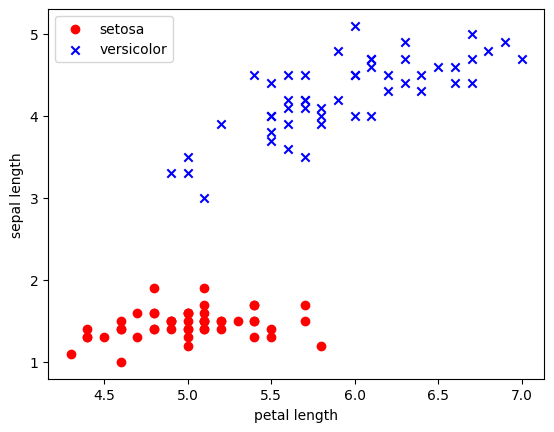

In [ ]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')

plt.ylabel('sepal length')

plt.legend(loc='upper left')

plt.show()

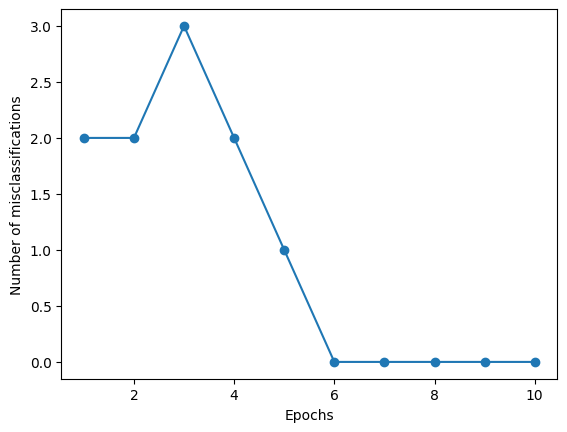

In [ ]:
pn = Perceptron(0.1, 10)

pn.fit(X, y)

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')

plt.xlabel('Epochs')

plt.ylabel('Number of misclassifications')

plt.show()

Experiment 6 Implementation of CNN

In [ ]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation="relu"))
#adding output layer
model.add(Dense(10,activation="softmax"))
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1500 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0532 - accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0109 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/

Experiment 7 - Implementationof RNN

In [ ]:
import numpy as np

# Define the RNN architecture
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W_xh = np.random.randn(hidden_size, input_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size)
        self.W_hy = np.random.randn(output_size, hidden_size)

        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))

    def forward(self, x):
        # Number of time steps
        T = len(x)

        # Initialize hidden state
        h = np.zeros((self.hidden_size, 1))

        # Lists to store intermediate values
        h_states = []
        y_preds = []

        for t in range(T):
            # Current input
            x_t = x[t].reshape(-1, 1)

            # RNN cell's hidden state update
            h = np.tanh(np.dot(self.W_xh, x_t) + np.dot(self.W_hh, h) + self.b_h)

            # Output prediction at the current time step
            y = np.dot(self.W_hy, h) + self.b_y

            # Store the values for this time step
            h_states.append(h)
            y_preds.append(y)

        return h_states, y_preds

# Example usage
if __name__ == "__main__":
    input_size = 3
    hidden_size = 4
    output_size = 2

    rnn = SimpleRNN(input_size, hidden_size, output_size)

    # Input sequence (3 time steps)
    x = [np.array([0.1, 0.2, 0.3]), np.array([0.4, 0.5, 0.6]), np.array([0.7, 0.8, 0.9])]

    # Forward pass
    h_states, y_preds = rnn.forward(x)

    # Print the final hidden state and output prediction
    print("Final hidden state:")
    print(h_states[-1])
    print("\nOutput prediction:")
    print(y_preds[-1])


Final hidden state:
[[-0.95379841]
 [ 0.99689041]
 [-0.23348435]
 [-0.99894668]]

Output prediction:
[[-0.76126786]
 [ 1.22370739]]


Code 2 of RNN

Epoch 1/20
187/187 - 2s - loss: 0.0148 - 2s/epoch - 13ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0087 - 402ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0077 - 436ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0071 - 421ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0066 - 421ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0063 - 426ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0060 - 414ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0057 - 431ms/epoch - 2ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0055 - 678ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0053 - 645ms/epoch - 3ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0052 - 651ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0050 - 654ms/epoch - 3ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0049 - 666ms/epoch - 4ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0047 - 633ms/epoch - 3ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0046 - 602ms/epoch - 3ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0

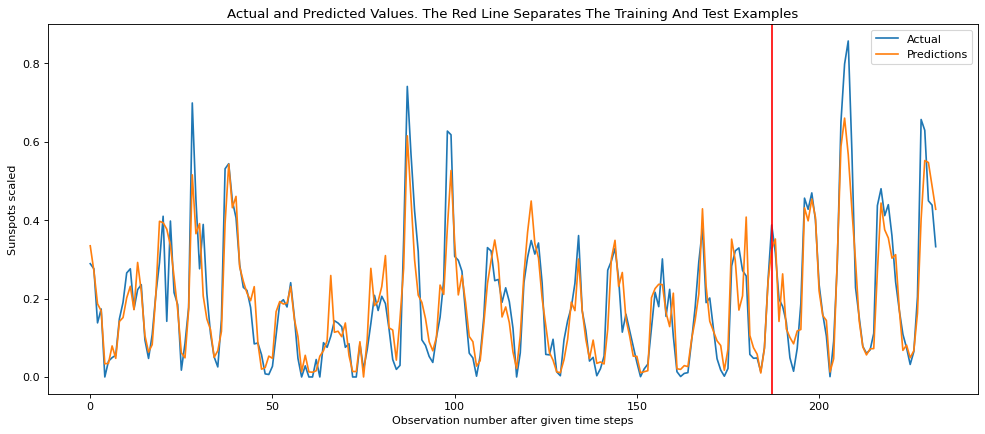

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

a = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(a)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)




Experiment 8 -> Time and Series forecasting using LSTM

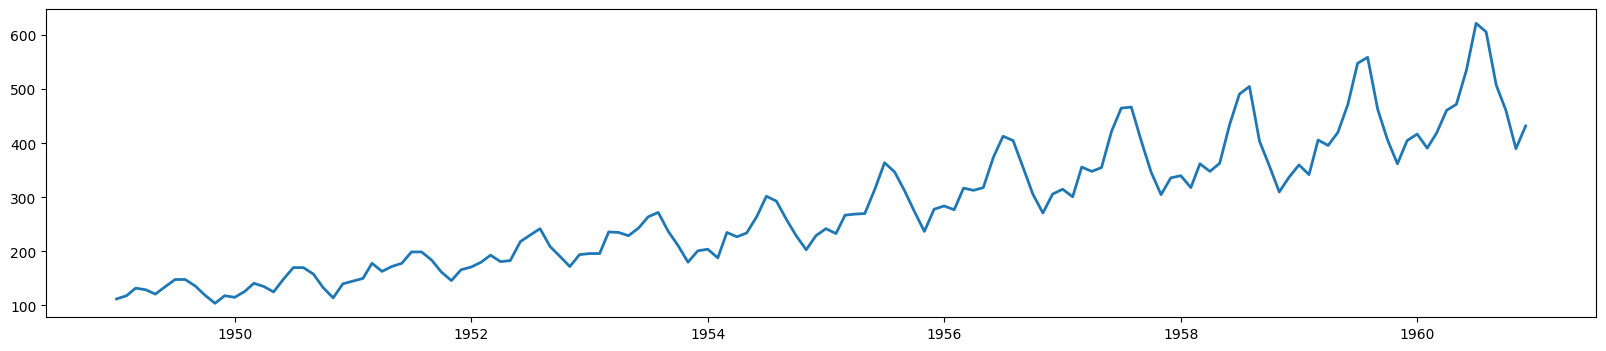

(12, 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/airline-passengers.csv", index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.shape
df.columns
plt.figure(figsize=(20, 4))
plt.plot(df.Passengers, linewidth=2)
plt.show()
nobs = 12
df_train = df.iloc[:-nobs]
df_test = df.iloc[-nobs:]
df_train.shape
df_test.shape

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train)
scaled_train = scaler.transform(df_train)
scaled_test = scaler.transform(df_test)
n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length =
n_inputs, batch_size =1)
for i in range(len(generator)):
    X, y = generator[i]
    print(f' \n {X.flatten()} and {y}')
X.shape

 
 [0.01758242 0.03076923 0.06153846 0.05494505 0.03736264 0.06813187
 0.0967033  0.0967033  0.07032967 0.03296703 0.         0.03076923] and [[0.02417582]]
 
 [0.03076923 0.06153846 0.05494505 0.03736264 0.06813187 0.0967033
 0.0967033  0.07032967 0.03296703 0.         0.03076923 0.02417582] and [[0.04835165]]
 
 [0.06153846 0.05494505 0.03736264 0.06813187 0.0967033  0.0967033
 0.07032967 0.03296703 0.         0.03076923 0.02417582 0.04835165] and [[0.08131868]]
 
 [0.05494505 0.03736264 0.06813187 0.0967033  0.0967033  0.07032967
 0.03296703 0.         0.03076923 0.02417582 0.04835165 0.08131868] and [[0.06813187]]
 
 [0.03736264 0.06813187 0.0967033  0.0967033  0.07032967 0.03296703
 0.         0.03076923 0.02417582 0.04835165 0.08131868 0.06813187] and [[0.04615385]]
 
 [0.06813187 0.0967033  0.0967033  0.07032967 0.03296703 0.
 0.03076923 0.02417582 0.04835165 0.08131868 0.06813187 0.04615385] and [[0.0989011]]
 
 [0.0967033  0.0967033  0.07032967 0.03296703 0.         0.03076923

(1, 12, 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               161600    
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
120/120 [==============================] - 5s 16ms/step - loss: 0.0305
Epoch 2/50
120/120 [==============================] - 2s 13ms/step - loss: 0.0104
Epoch 3/50
120/120 [==============================] - 2s 13ms/step - loss: 0.0131
Epoch 4/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0080
Epoch 5/50
120/120 [==============================] - 3s 21ms/step - loss: 0.0078
Epoch 6/50
120/120 [==============

<ipython-input-13-dc6d3bc112bb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predictions'] = y_pred_final


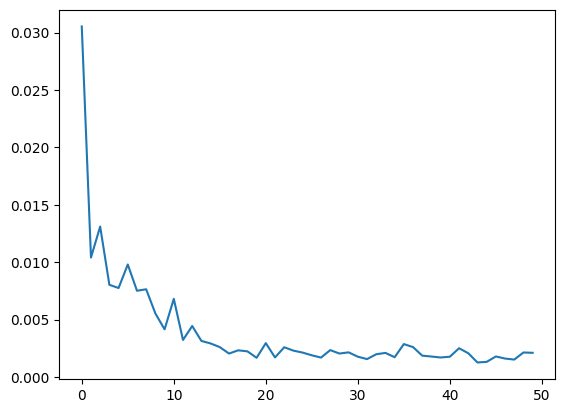

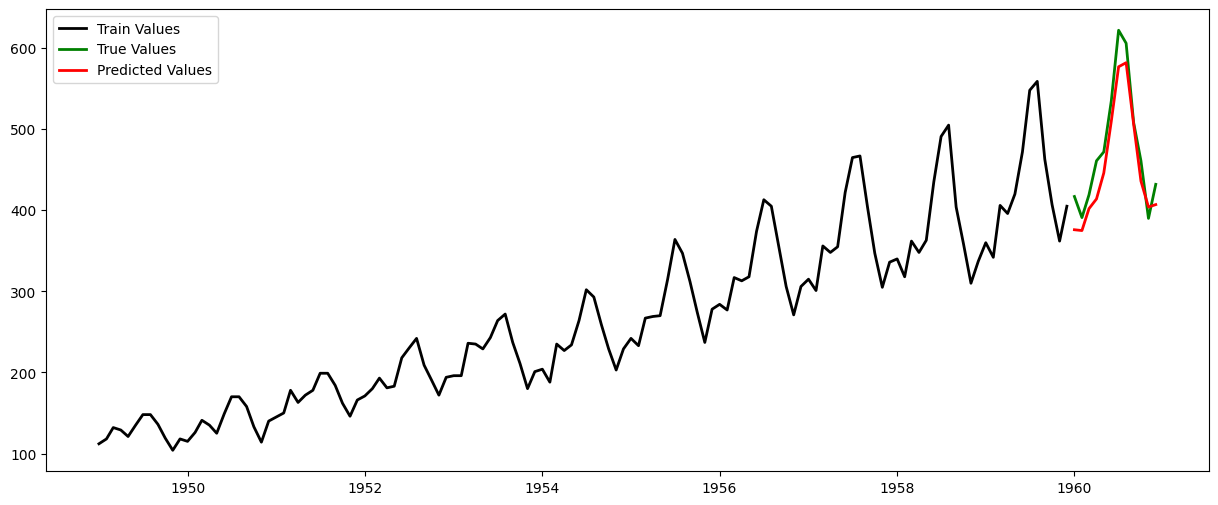

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape = (n_inputs,
n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs = 50)
plt.plot(model.history.history['loss'])
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape(1, 12, 1)
last_train_batch
model.predict(last_train_batch)
scaled_test[0]
y_pred = []
first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)
for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    y_pred.append(pred)
    current_batch = np.append(current_batch[:,1:, :], [[pred]], axis = 1)
y_pred
scaled_test
df_test
y_pred_transformed = scaler.inverse_transform(y_pred)
y_pred_transformed = np.round(y_pred_transformed,0)
y_pred_final = y_pred_transformed.astype(int)
y_pred_final
df_test.values, y_pred_final
df_test['Predictions'] = y_pred_final
df_test
plt.figure(figsize=(15, 6))
plt.plot(df_train.index, df_train.Passengers, linewidth=2, color='black',
label='Train Values')
plt.plot(df_test.index, df_test.Passengers, linewidth=2, color='green',
label='True Values')
plt.plot(df_test.index, df_test.Predictions, linewidth=2, color='red',
label='Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(df_test.Passengers, df_test.Predictions))

28.558419657490386